# ATP Tennis Data - Feature Testing

In this notebook, I will be testing various features generated from player and match history using Gradient Boosting to see which potential features would help our model in predicting wins and losses

Since nominal features have been one hot encoded and some have thousands of feature column, I will only be using ordinal features for this notebook as it is faster to train. 

We will run a subset of these datasets through the model withour our base ordinal features to see how they affect our model

Previous results using basic ordinal features - ie, player rank, etc

```
Model Score: 0.6801147873058744

ROC/AUC Score: 0.680113804808443
              precision    recall  f1-score   support

        Loss       0.68      0.68      0.68     14815
         Win       0.68      0.68      0.68     14805

    accuracy                           0.68     29620
   macro avg       0.68      0.68      0.68     29620
weighted avg       0.68      0.68      0.68     29620
```

# Summary of Results

* player record and stats for player for the previous 5 matches seem to have the most effect on the model.
* matchup data does not seem to be a good predictor for wins and losses

Adding these features did help our model slightly although it was only around a .3% boost from our previous dataset suggesting they are adding little new information for our model

```
Model Score: 0.6829169480081027

ROC/AUC Score: 0.6829166839061929
              precision    recall  f1-score   support

        Loss       0.68      0.68      0.68     14815
         Win       0.68      0.68      0.68     14805

    accuracy                           0.68     29620
   macro avg       0.68      0.68      0.68     29620
weighted avg       0.68      0.68      0.68     29620
```



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.decomposition import PCA
from datetime import datetime
import pickle
import json
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from util import jupyter_util as ju
from util.model_util import ModelWrapper, RSTATE, N_JOBS, MAX_ITER, LABEL_COL
import util.model_util as mu
import logging
import importlib

logging.basicConfig(level=logging.INFO)
%matplotlib inline
sns.set()


# date
DATE_FORMAT = '%Y-%m-%d %H:%m'
DATE = datetime.now().strftime(DATE_FORMAT)


# sometimes I run these notebooks via command line. Environment variable is set so we know whether we are in DEBUG mode or not
# if you want to manually run this in DEBUG mode, change default value to True
DEBUG = bool(os.environ.get("IPYNB_DEBUG", False))

if DEBUG:
    DESCRIPTION_SUFFIX = f"-test"
    FEATURE_FILE = '../datasets/atp_matches_1985-2019_features_test-raw_diff-ohe-history-matchup-stats.csv'
    ModelWrapper.REPORT_FILE = '../reports/summary-test.csv'
else:
    DESCRIPTION_SUFFIX = ""
    FEATURE_FILE = '../datasets/atp_matches_1985-2019_features-raw_diff-ohe-history-matchup-stats.csv'




START_YEAR = 1998
END_YEAR = 2018
MODEL = 'GrandientBoostingClassifier'

# Load our data

In [2]:
print(f'Loading {FEATURE_FILE}')
data = pd.read_csv(FEATURE_FILE)

Loading ../datasets/atp_matches_1985-2019_features-raw_diff-ohe-history-matchup-stats.csv


# Run all Models

In [3]:
models = [
    GradientBoostingClassifier(random_state=RSTATE, verbose=1, n_iter_no_change = 4),
]

INFO:util.model_util:Adding filter: util.model_util.BaseDiffFilter
INFO:util.model_util:Copying features dataframe
INFO:util.model_util:Shape before filtering: (118478, 5464)
INFO:util.model_util:Shape after filtering: (118478, 5)
INFO:util.model_util:Final Features shape: (118478, 5)


Final columns: Index(['tourney_level_label', 'tourney_year', 'age_diff', 'ht_diff',
       'rank_diff'],
      dtype='object')


Running GradientBoostingClassifier Description diff
      Iter       Train Loss   Remaining Time 
         1           1.3653            2.62s
         2           1.3481            2.82s
         3           1.3340            2.89s
         4           1.3225            2.72s
         5           1.3130            2.60s
         6           1.3051            2.56s
         7           1.2986            2.63s
         8           1.2931            2.63s
         9           1.2885            2.57s
        10           1.2848            2.54s
        20           1.2670            2.21s
        30           1.2613            1.91s
        40           1.2570            1.59s
        50           1.2549            1.30s
        60           1.2536            1.00s
Model Score: 0.6546590141796084

ROC/AUC Score: 0.6546580287807193
              precision    reca

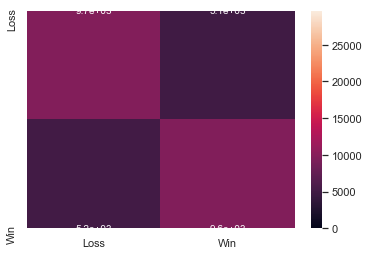

INFO:util.model_util:Saving model file: ../models/gradientboostingclassifier-1998-2018-diff.pkl
INFO:util.model_util:Reading report: ../reports/summary.csv
INFO:util.model_util:Adding filter: util.model_util.History5WinLossFilter
INFO:util.model_util:Copying features dataframe


Saving report: ../reports/summary.csv


INFO:util.model_util:Shape before filtering: (118478, 5464)
INFO:util.model_util:Shape after filtering: (118478, 4)
INFO:util.model_util:Final Features shape: (118478, 4)


Final columns: Index(['p1_history5_losses', 'p1_history5_wins', 'p2_history5_losses',
       'p2_history5_wins'],
      dtype='object')


Running GradientBoostingClassifier Description history5_win_loss
      Iter       Train Loss   Remaining Time 
         1           1.3755            1.75s
         2           1.3666            1.86s
         3           1.3590            1.79s
         4           1.3524            1.74s
         5           1.3469            1.70s
         6           1.3420            1.66s
         7           1.3379            1.63s
         8           1.3343            1.61s
         9           1.3312            1.59s
        10           1.3283            1.57s
        20           1.3148            1.40s
        30           1.3108            1.22s
        40           1.3095            1.03s
Model Score: 0.6029372045914922

ROC/AUC Score: 0.6029489562991405
              precision    recall  f1-score   support

        Loss       0.61      0.57      0.59 

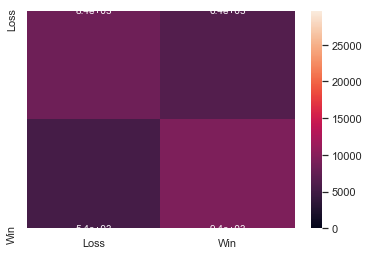

INFO:util.model_util:Saving model file: ../models/gradientboostingclassifier-1998-2018-history5_win_loss.pkl
INFO:util.model_util:Reading report: ../reports/summary.csv
INFO:util.model_util:Adding filter: util.model_util.History10WinPercentageFilter
INFO:util.model_util:Copying features dataframe


Saving report: ../reports/summary.csv


INFO:util.model_util:Shape before filtering: (118478, 5464)
INFO:util.model_util:Shape after filtering: (118478, 2)
INFO:util.model_util:Final Features shape: (118478, 2)


Final columns: Index(['p1_history10_win_percentage', 'p2_history10_win_percentage'], dtype='object')


Running GradientBoostingClassifier Description history5_win_perc
      Iter       Train Loss   Remaining Time 
         1           1.3725            1.45s
         2           1.3607            1.54s
         3           1.3506            1.46s
         4           1.3421            1.45s
         5           1.3350            1.43s
         6           1.3288            1.41s
         7           1.3235            1.39s
         8           1.3188            1.38s
         9           1.3148            1.36s
        10           1.3114            1.33s
        20           1.2927            1.15s
        30           1.2870            0.99s
        40           1.2849            0.83s
        50           1.2839            0.68s
Model Score: 0.6219446320054017

ROC/AUC Score: 0.6219663363630447
              precision    recall  f1-score   support

        Loss       0.64      0.56 

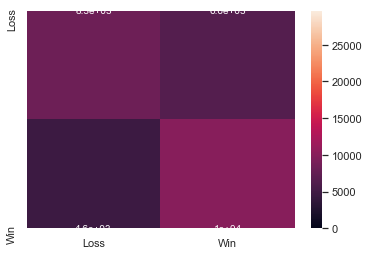

INFO:util.model_util:Saving model file: ../models/gradientboostingclassifier-1998-2018-history5_win_perc.pkl
INFO:util.model_util:Reading report: ../reports/summary.csv


Saving report: ../reports/summary.csv

INFO:util.model_util:Adding filter: util.model_util.Matchup5WinLossFilter
INFO:util.model_util:Copying features dataframe


INFO:util.model_util:Shape before filtering: (118478, 5464)
INFO:util.model_util:Shape after filtering: (118478, 2)
INFO:util.model_util:Final Features shape: (118478, 2)


Final columns: Index(['p1_matchup5_losses', 'p1_matchup5_wins'], dtype='object')


Running GradientBoostingClassifier Description matchup5_win_loss
      Iter       Train Loss   Remaining Time 
         1           1.3825            1.30s
         2           1.3793            1.37s
         3           1.3766            1.30s
         4           1.3742            1.32s
         5           1.3723            1.25s
         6           1.3706            1.21s
         7           1.3693            1.18s
         8           1.3681            1.15s
         9           1.3670            1.14s
        10           1.3662            1.14s
        20           1.3625            1.15s
        30           1.3618            0.96s
Model Score: 0.5469615124915598

ROC/AUC Score: 0.5468708350872058
              precision    recall  f1-score   support

        Loss       0.53      0.82      0.64     14815
         Win       0.60      0.28      0.38     14805

    accuracy                       

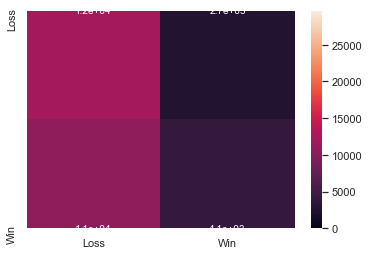

INFO:util.model_util:Saving model file: ../models/gradientboostingclassifier-1998-2018-matchup5_win_loss.pkl
INFO:util.model_util:Reading report: ../reports/summary.csv
INFO:util.model_util:Adding filter: util.model_util.Matchup10WinPercentageFilter
INFO:util.model_util:Copying features dataframe


Saving report: ../reports/summary.csv


INFO:util.model_util:Shape before filtering: (118478, 5464)
INFO:util.model_util:Shape after filtering: (118478, 2)
INFO:util.model_util:Final Features shape: (118478, 2)


Final columns: Index(['p1_matchup10_win_percentage', 'p2_matchup10_win_percentage'], dtype='object')


Running GradientBoostingClassifier Description matchup5_win_perc
      Iter       Train Loss   Remaining Time 
         1           1.3834            1.02s
         2           1.3811            1.17s
         3           1.3791            1.14s
         4           1.3775            1.15s
         5           1.3762            1.14s
         6           1.3752            1.12s
         7           1.3743            1.09s
         8           1.3736            1.07s
         9           1.3730            1.06s
        10           1.3725            1.05s
        20           1.3707            0.94s
        30           1.3703            0.81s
Model Score: 0.5464550979068197

ROC/AUC Score: 0.5463798875766332
              precision    recall  f1-score   support

        Loss       0.53      0.77      0.63     14815
         Win       0.58      0.32      0.42     14805

    accuracy   

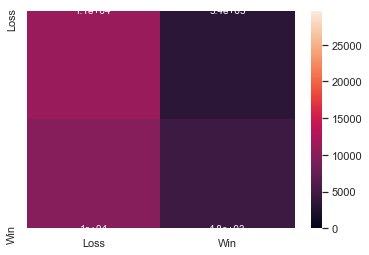

INFO:util.model_util:Saving model file: ../models/gradientboostingclassifier-1998-2018-matchup5_win_perc.pkl
INFO:util.model_util:Reading report: ../reports/summary.csv
INFO:util.model_util:Adding filter: util.model_util.Stats5RawFilter
INFO:util.model_util:Copying features dataframe


Saving report: ../reports/summary.csv


INFO:util.model_util:Shape before filtering: (118478, 5464)
INFO:util.model_util:Shape after filtering: (118478, 18)
INFO:util.model_util:Final Features shape: (118478, 18)


Final columns: Index(['p1_stats5_1stin', 'p1_stats5_1stwon', 'p1_stats5_2ndwon',
       'p1_stats5_ace', 'p1_stats5_bpfaced', 'p1_stats5_bpsaved',
       'p1_stats5_df', 'p1_stats5_svgms', 'p1_stats5_svpt', 'p2_stats5_1stin',
       'p2_stats5_1stwon', 'p2_stats5_2ndwon', 'p2_stats5_ace',
       'p2_stats5_bpfaced', 'p2_stats5_bpsaved', 'p2_stats5_df',
       'p2_stats5_svgms', 'p2_stats5_svpt'],
      dtype='object')


Running GradientBoostingClassifier Description stats5
      Iter       Train Loss   Remaining Time 
         1           1.3828            5.76s
         2           1.3798            6.45s
         3           1.3765            6.47s
         4           1.3738            6.31s
         5           1.3710            6.20s
         6           1.3686            6.23s
         7           1.3662            6.20s
         8           1.3641            6.12s
         9           1.3618            6.06s
        10           1.3598            6.04s
        20           1.346

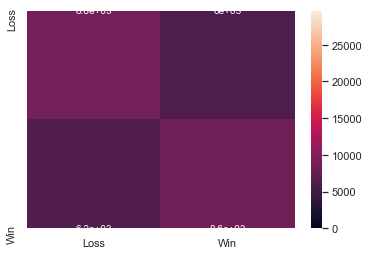

INFO:util.model_util:Saving model file: ../models/gradientboostingclassifier-1998-2018-stats5.pkl
INFO:util.model_util:Reading report: ../reports/summary.csv


Saving report: ../reports/summary.csv


INFO:util.model_util:Adding filter: util.model_util.Stats5PercentageFilter
INFO:util.model_util:Copying features dataframe
INFO:util.model_util:Shape before filtering: (118478, 5464)
INFO:util.model_util:Shape after filtering: (118478, 6)
INFO:util.model_util:Final Features shape: (118478, 6)


Final columns: Index(['p1_stats5_1stin_percentage', 'p1_stats5_ace_percentage',
       'p1_stats5_bpsaved_percentage', 'p2_stats5_1stin_percentage',
       'p2_stats5_ace_percentage', 'p2_stats5_bpsaved_percentage'],
      dtype='object')


Running GradientBoostingClassifier Description stats5_perc
      Iter       Train Loss   Remaining Time 
         1           1.3831            3.72s
         2           1.3804            3.69s
         3           1.3781            3.68s
         4           1.3760            3.62s
         5           1.3743            3.59s
         6           1.3727            3.53s
         7           1.3712            3.50s
         8           1.3699            3.42s
         9           1.3688            3.40s
        10           1.3677            3.31s
        20           1.3606            2.98s
        30           1.3566            2.57s
        40           1.3542            2.19s
        50           1.3525            1.80s
        60           1.3

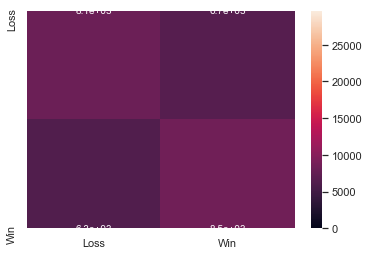

INFO:util.model_util:Saving model file: ../models/gradientboostingclassifier-1998-2018-stats5_perc.pkl
INFO:util.model_util:Reading report: ../reports/summary.csv


Saving report: ../reports/summary.csv


In [4]:
importlib.reload(mu)

filter_map = {
    "diff": ["util.model_util.BaseDiffFilter"],
    "history5_win_loss": ["util.model_util.History5WinLossFilter"],
    "history5_win_perc": ["util.model_util.History5WinPercentageFilter"],
    "history5_win_perc": ["util.model_util.History10WinPercentageFilter"],
    "matchup5_win_loss": ["util.model_util.Matchup5WinLossFilter"],
    "matchup5_win_perc": ["util.model_util.Matchup5WinPercentageFilter"],
    "matchup5_win_perc": ["util.model_util.Matchup10WinPercentageFilter"],
    "stats5": ["util.model_util.Stats5RawFilter"],
    "stats5_perc": ["util.model_util.Stats5PercentageFilter"],
}


for description, filters in filter_map.items():

    X_train, X_test, y_train, y_test = ModelWrapper.get_data(data, LABEL_COL, START_YEAR, END_YEAR, column_filters = filters)
    print(f'Final columns: {X_test.columns}')
    for model in models:
        print(f'\n\nRunning {type(model).__name__} Description {description}')
        mw = mu.ModelWrapper(model,
                      description = f'{description}{DESCRIPTION_SUFFIX}', 
                     data_file = FEATURE_FILE,
                      start_year = START_YEAR,
                      end_year = END_YEAR,
                        column_filters = filters)
        mw.fit(X_train, y_train)
        predict = mw.predict(X_test)
        mw.analyze(y_test)
        plt.show()
        mw.save()

# Summary

The following extra data seems to be the most predictive
* History Win Percentage for players (last 5 matches)
* Player stats from last 5 matches


* Matchup history was not a good indicator for wins


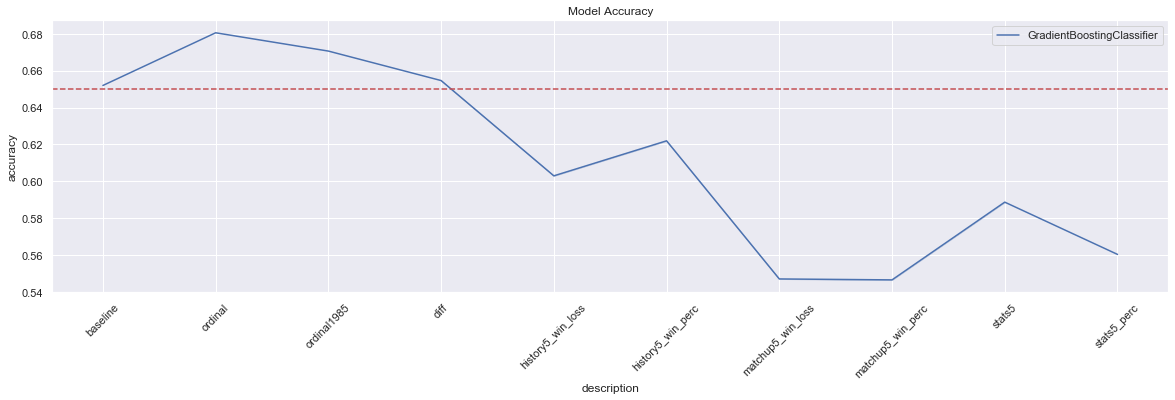

In [5]:
report = pd.read_csv(ModelWrapper.REPORT_FILE)

for model in models:
    model_name = type(model).__name__

    dt_report = report[(report.model_name == model_name)]

    f, a = plt.subplots(1, 1, figsize=(20, 5))
    _ = sns.lineplot(x="description", y="accuracy", data=dt_report, ax=a, sort=False, label = model_name)
    _ = a.axhline(0.65, ls='--', color='r')
    _ = plt.xticks(rotation=45)

    
_ = a.set_title(f"Model Accuracy")


## Let's combine the features

INFO:util.model_util:Adding filter: util.model_util.BaseOrdinalFilter
INFO:util.model_util:Adding filter: util.model_util.History5WinPercentageFilter
INFO:util.model_util:Adding filter: util.model_util.Stats5RawFilter
INFO:util.model_util:Copying features dataframe
INFO:util.model_util:Shape before filtering: (118478, 5464)
INFO:util.model_util:Shape after filtering: (118478, 31)
INFO:util.model_util:Final Features shape: (118478, 31)


Final columns: Index(['draw_size', 'round_label', 'tourney_level_label', 'tourney_month',
       'tourney_year', 'p1_age', 'p1_ht', 'p1_rank', 'p2_age', 'p2_ht',
       'p2_rank', 'p1_history5_win_percentage', 'p2_history5_win_percentage',
       'p1_stats5_1stin', 'p1_stats5_1stwon', 'p1_stats5_2ndwon',
       'p1_stats5_ace', 'p1_stats5_bpfaced', 'p1_stats5_bpsaved',
       'p1_stats5_df', 'p1_stats5_svgms', 'p1_stats5_svpt', 'p2_stats5_1stin',
       'p2_stats5_1stwon', 'p2_stats5_2ndwon', 'p2_stats5_ace',
       'p2_stats5_bpfaced', 'p2_stats5_bpsaved', 'p2_stats5_df',
       'p2_stats5_svgms', 'p2_stats5_svpt'],
      dtype='object')


Running GradientBoostingClassifier Description ordinal-history5_win_perc-stats5
      Iter       Train Loss   Remaining Time 
         1           1.3665           13.16s
         2           1.3496           12.99s
         3           1.3349           12.70s
         4           1.3227           12.61s
         5           1.3119           12.61s


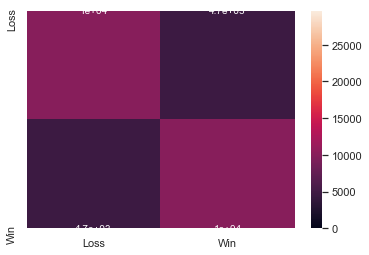

INFO:util.model_util:Saving model file: ../models/gradientboostingclassifier-1998-2018-ordinal-history5_win_perc-stats5.pkl
INFO:util.model_util:Reading report: ../reports/summary.csv


Saving report: ../reports/summary.csv


In [15]:
importlib.reload(mu)

filters = ["util.model_util.BaseOrdinalFilter", "util.model_util.History5WinPercentageFilter", "util.model_util.Stats5RawFilter"]
description='ordinal-history5_win_perc-stats5'

X_train, X_test, y_train, y_test = ModelWrapper.get_data(data, LABEL_COL, START_YEAR, END_YEAR, column_filters = filters)
print(f'Final columns: {X_test.columns}')
print(f'\n\nRunning {type(model).__name__} Description {description}')
mw = mu.ModelWrapper(model,
              description = f'{description}{DESCRIPTION_SUFFIX}', 
             data_file = FEATURE_FILE,
              start_year = START_YEAR,
              end_year = END_YEAR,
                column_filters = filters)
mw.fit(X_train, y_train)
predict = mw.predict(X_test)
mw.analyze(y_test)
plt.show()
mw.save()

# Feature Importance

In [16]:
# importlib.reload(mu)

# mw = mu.ModelWrapper.load_model_wrapper(report, 
#                                         model_name = MODEL, 
#                                         description = 'ordinal', 
#                                         start_year = 1998,
#                                         end_year = 2018,
#                                         load_data = True)

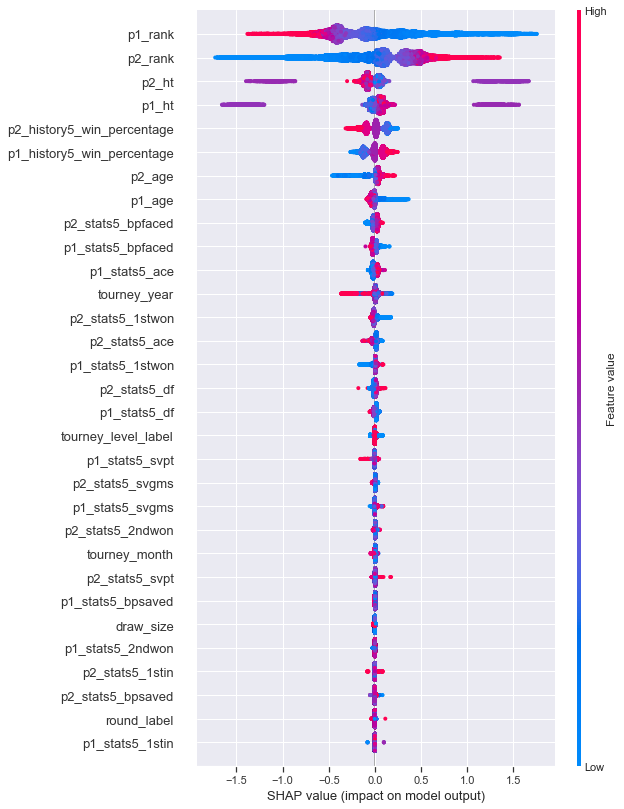

In [17]:
import shap

shap.initjs()

explainer = shap.TreeExplainer(mw.model, data=mw.X_train.values)
shap_values = explainer.shap_values(mw.X_test.values)
shap.summary_plot(shap_values, mw.X_test, max_display=50)

In [18]:
shap_df = pd.DataFrame(shap_values, columns=mw.X_test.columns)
shap_df.describe()

,draw_size,round_label,tourney_level_label,tourney_month,tourney_year,p1_age,p1_ht,p1_rank,p2_age,p2_ht,...,p1_stats5_svpt,p2_stats5_1stin,p2_stats5_1stwon,p2_stats5_2ndwon,p2_stats5_ace,p2_stats5_bpfaced,p2_stats5_bpsaved,p2_stats5_df,p2_stats5_svgms,p2_stats5_svpt
count,29620.000000,29620.000000,29620.000000,29620.000000,29620.000000,29620.000000,29620.000000,29620.000000,29620.000000,29620.000000,...,29620.000000,29620.000000,29620.000000,29620.000000,29620.000000,29620.000000,29620.000000,29620.000000,29620.000000,29620.000000
mean,0.000234,-0.000135,0.000177,0.000193,-0.000610,-0.000157,0.008147,-0.006684,0.003085,-0.003806,...,-0.000259,0.000092,-0.000724,0.000164,0.000397,-0.000708,0.000191,-0.001079,-0.000188,0.000665
std,0.003885,0.002411,0.014460,0.004857,0.040414,0.060582,0.310565,0.512409,0.073432,0.291871,...,0.009454,0.005191,0.026946,0.006176,0.021925,0.031307,0.003401,0.015993,0.007136,0.005546
min,-0.020168,-0.034068,-0.052298,-0.045107,-0.365655,-0.090978,-1.657114,-1.381148,-0.465146,-1.396565,...,-0.157432,-0.084787,-0.048166,-0.025631,-0.135926,-0.104666,-0.051400,-0.179472,-0.031954,-0.033333
25%,0.000510,-0.000002,-0.003451,-0.002576,-0.005351,-0.038584,-0.027784,-0.403934,0.006173,-0.088065,...,-0.004047,-0.000653,-0.016328,-0.003560,-0.020804,-0.019878,-0.000597,-0.011980,-0.002768,-0.000125
50%,0.000707,0.000067,-0.000042,0.001415,0.003935,-0.010235,0.050864,-0.077542,0.024715,-0.057639,...,-0.002513,-0.000590,-0.009588,0.002149,0.010343,0.008862,-0.000587,0.000103,0.002266,0.001267
75%,0.000891,0.000330,0.003265,0.002796,0.010870,0.005009,0.071586,0.290739,0.039585,0.040557,...,-0.001310,-0.000440,0.015845,0.003175,0.016074,0.025152,-0.000197,0.010100,0.003156,0.002175
max,0.010314,0.112829,0.087134,0.036437,0.189008,0.365682,1.560524,1.753875,0.218542,1.667256,...,0.045859,0.080702,0.174666,0.054786,0.082882,0.085818,0.080983,0.114659,0.034673,0.175273


In [9]:
print(f'Last Finished: {datetime.now().strftime(DATE_FORMAT)}')

Last Finished: 2019-10-30 11:10
